## Classification

### KNighborsClassifier & KNighborsRegressor
用來實作KNN.
這兩種模型都可以用於分類和回歸問題。在KNeighborsClassifier中，每個樣本的類別是由其k個最近鄰居的類別決定的。在KNeighborsRegressor中，每個樣本的目標值是由其k個最近鄰居的目標值的平均值決定的。

- n_neighbors -> k值
- weights -> uniform(平均) or distance(距離), 預設是uniform
- algorithm -> auto, ball_tree, kd_tree, brute, 預設是auto
- leaf_size -> 葉子的大小, 預設是30 (只有在algorithm是ball_tree or kd_tree才有用). 用來加速 (葉子越大, 計算越快, 但是準確度越低)
- p -> 1: 曼哈頓距離, 2: 歐幾里德距離, 預設是2

/var/folders/nx/572m25wj2z3f1lzmb7pl257c0000gn/T/ipykernel_13196/2226395517.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles.append(plt.scatter([], [], c=plt.cm.tab10(i), label=iris.target_names[i]))


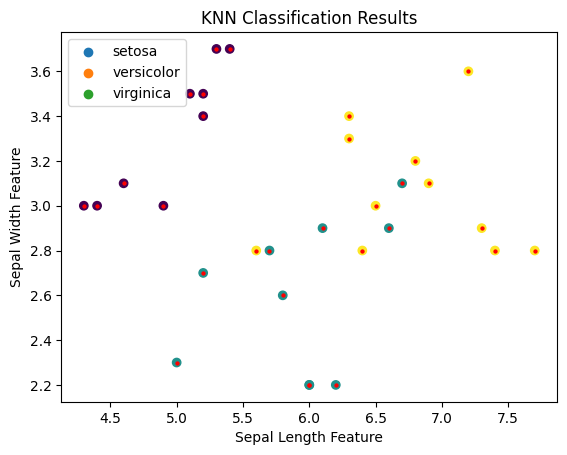

/var/folders/nx/572m25wj2z3f1lzmb7pl257c0000gn/T/ipykernel_13196/2226395517.py:51: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles.append(plt.scatter([], [], c=plt.cm.tab10(i), label=iris.target_names[i]))


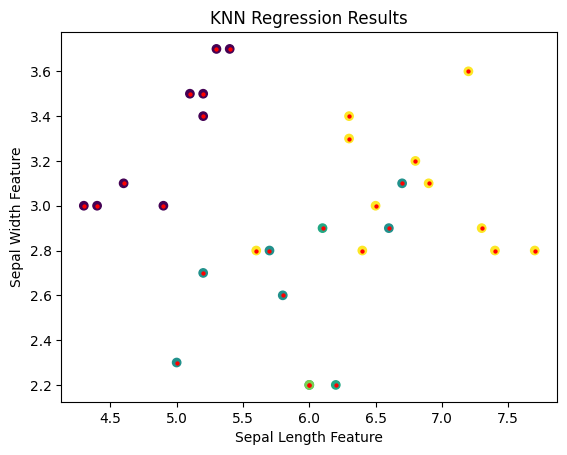

In [14]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# using iris
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', s=5, linewidths=2, c='red')

plt.xlabel('Sepal Length Feature')
plt.ylabel('Sepal Width Feature')
plt.title('KNN Classification Results')

# red markers are testing data points, other colors are predicted classes
handles = []
labels = []
for i in range(len(iris.target_names)):
    handles.append(plt.scatter([], [], c=plt.cm.tab10(i), label=iris.target_names[i]))
    labels.append(iris.target_names[i])
plt.legend(handles, labels)

plt.show()


reg = KNeighborsRegressor(n_neighbors=5)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', s=5, linewidths=2, c='red')

plt.xlabel('Sepal Length Feature')
plt.ylabel('Sepal Width Feature')
plt.title('KNN Regression Results')

handles = []
labels = []
for i in range(len(iris.target_names)):
    handles.append(plt.scatter([], [], c=plt.cm.tab10(i), label=iris.target_names[i]))
    labels.append(iris.target_names[i])

plt.show()

## Naïve Bayes Classifiers

### Guassian Naive Bayes


### MultinominalNB
